<a href="https://colab.research.google.com/github/luigigenovese/BigDFT-nb/blob/master/ConnectivityMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install pybigdft biopython ase dna-features-viewer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
def correct_data(structure):
  from ase.units import Hartree,kcal,mol
  factor=Hartree/(kcal/mol)
  dispersion = structure.fragment_values('dispersion_interactions')
  total = structure.fragment_values('total_interactions') - dispersion
  dispersion /= factor
  total += dispersion
  structure.set_fragment_quantities('total_interactions',total)
  structure.set_fragment_quantities('dispersion_interactions',dispersion)

In [30]:
from BigDFT import BioQM
structure = BioQM.load('1kac-1.2.tar.bz2',serialization_version='1.2')
correct_data(structure)

/usr/local/lib/python3.8/dist-packages/Bio/SeqIO/PdbIO.py:322: BiopythonParserWarning: 'HEADER' line not found; can't determine PDB ID.
  warnings.warn(


In [31]:
sys=structure
chainA=[sys.fragment_names.index(frag) for frag in sys.sequences_to_fragments[0]]
chainB=[sys.fragment_names.index(frag) for frag in sys.sequences_to_fragments[1]]

In [32]:
cutoff=0.001
connectivity_matrix = BioQM.graph_bond(structure.fragment_names, cutoff, structure.bond_orders)

In [33]:
cm=connectivity_matrix[chainA].T[chainB].T

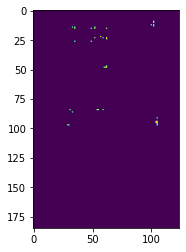

In [34]:
from matplotlib.pyplot import subplots
fig,ax = subplots()
ax.imshow(cm)

In [39]:
def display_structure(sys):
  cd = sys.colordict()
  from BigDFT.Interop import DNAviewerInterop as D
  return D.display_records(D.sys_into_records(structure,features={
      'Tot':'total_interactions',
      'El':'electrostatic_interactions',
      'H':'contact_interactions',
      'vdW':'dispersion_interactions'
      },field_vals={'Tot':'total_interactions'}))

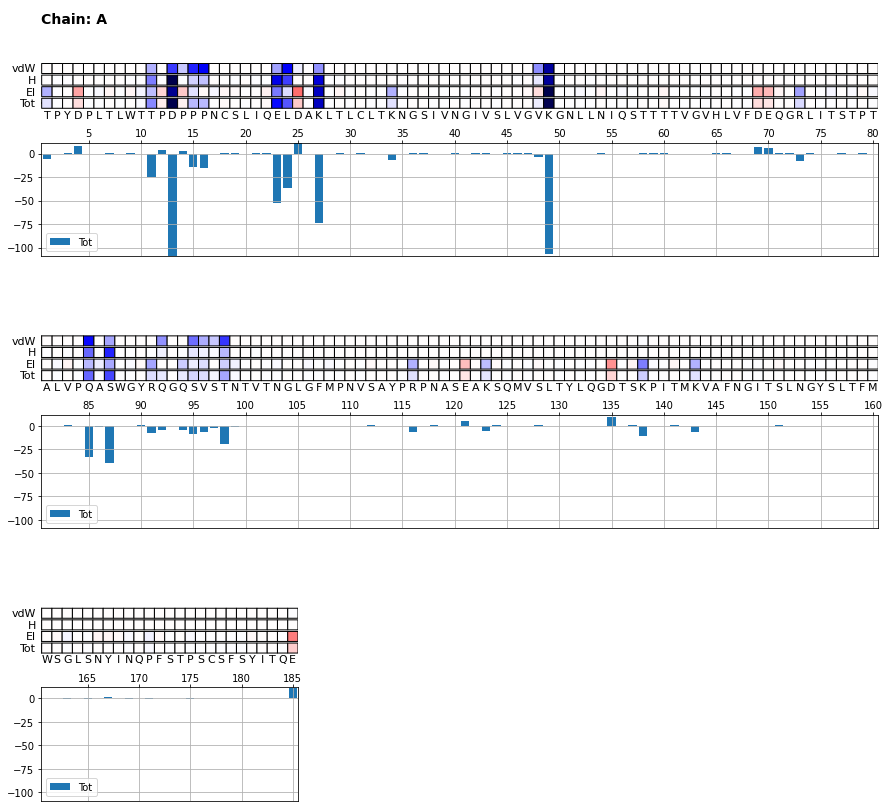

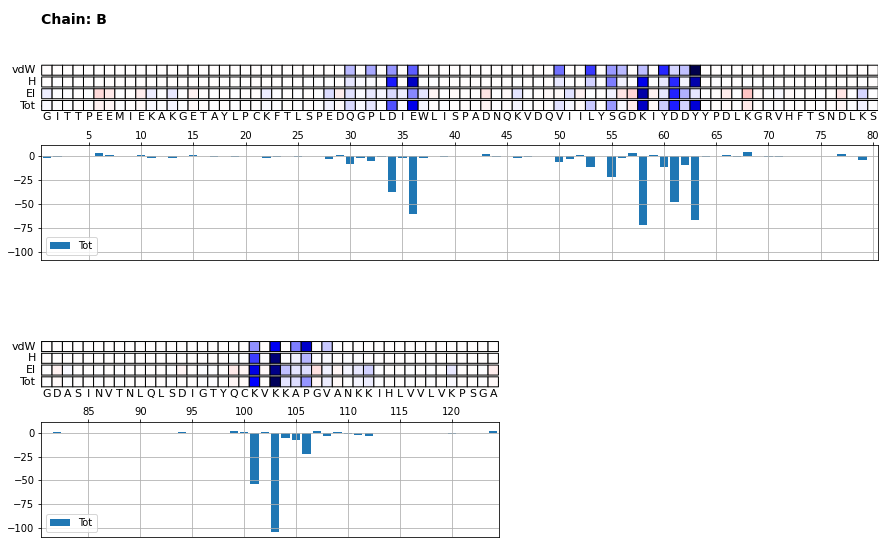

In [40]:
_=display_structure(structure)

In [41]:
interaction = 0.5 * sum(structure.fragment_values('total_interactions'))

In [42]:
interaction

-547.1592553805648